### Supervised Learning 3: Decision Trees

Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are intuitive, easy to interpret models. In this notebook, we will explore the concept of Decision Trees and apply them to a credit scoring dataset to predict credit status.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

## Table of Contents

1. [Loading, Inspecting and Preprocessing data](#data-loading)
2. [Decision Trees - Introduction](#decision-tree-introduction)
3. [Decision Trees - Learning Algorithm](#decision-tree-learning)
4. [Continue dataset prepartion for model training](#continue-dataset-preparation)
5. [Training Decision Tree Model](#training-decision-tree)
    1. [F1-Score](#f1-score)
6. [Random Forests](#random-forests)
7. [XGBoost](#xgboost)
    1. [Training](#xgboost)
    2. [Improving accuracy](#setting-scale_pos_weight_param)

## Loading, Inspecting and Preprocessing data<a id="data-loading">

Here is a description of each column:

1. **Seniority** (Feature) - The number of years the client has been employed or has had a particular job

2. **Home** (Feature) - The type of home ownership or housing situation the client is in.

3. **Time** (Feature) - The duration of the loan in months, requested by the client.
4. **Age** (Feature) - The age of the client.
5. **Marital** (Feature) - The marital status of the client.

6. **Records** (Feature) - Indicates whether the client has negative financial records (e.g., previous defaults):
    - 0: No negative records
    - 1: Has negative records
    
   
7. **Job** (Feature) - The type of job the client holds.

8. **Expenses** (Feature) - The client’s monthly expenses, representing the total amount spent on essential living costs. 

9. **Income** (Feature) - The client’s monthly income, representing how much they earn. 

10. **Assets** (Feature) - The total value of the client’s assets, including savings or property owned.

11. **Debt** (Feature) - The total outstanding debt of the client, representing the amount they owe to financial institutions or other creditors. 

12. **Amount** (Feature) - The total amount of the loan requested by the client. 

13. **Price** (Feature) - The price of the good or service that the loan is intended to finance (e.g., the price of a car or appliance). 

14. **Status** (Target Variable) - The credit status of the client, indicating whether they have defaulted on their loan or not:
   - 0: No default
   - 1: Default
   

In [3]:
df = pd.read_csv('data/CreditScoring_final.csv')

In [4]:
df.describe()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3.118000e+03,3.118000e+03,3.118000e+03,3118.000000,3118.000000
mean,8.123477,46.233483,37.121552,0.179282,55.735087,7.698538e+05,1.224097e+06,4.493422e+05,1038.024054,1462.111610
std,8.235690,14.743905,11.032674,0.383649,19.499835,8.740952e+06,1.097330e+07,6.686779e+06,476.781416,640.337326
min,0.000000,6.000000,18.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,0.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1114.000000
50%,5.000000,48.000000,36.000000,0.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,0.000000,73.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1685.500000
max,47.000000,72.000000,68.000000,1.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [5]:
df.describe().astype(int)

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,3118,3118,3118,3118,3118,3118,3118,3118,3118,3118
mean,8,46,37,0,55,769853,1224097,449342,1038,1462
std,8,14,11,0,19,8740952,10973301,6686778,476,640
min,0,6,18,0,35,0,0,0,100,105
25%,2,36,28,0,35,80,0,0,700,1114
50%,5,48,36,0,51,120,3500,0,1000,1400
75%,12,60,45,0,73,166,6000,0,1300,1685
max,47,72,68,1,180,99999999,99999999,99999999,5000,11140


In [6]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,5,owner,18,29,married,0,fixed,45,142,6000,3000,450,1678
1,ok,12,owner,36,56,married,0,fixed,75,205,5500,1950,275,300
2,ok,2,parents,36,19,married,0,fixed,35,162,4000,100,400,570
3,ok,10,owner,48,50,married,0,freelance,45,128,11500,0,500,1195
4,ok,2,parents,36,34,married,0,fixed,60,400,9800,0,900,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,ok,20,other,60,39,married,0,fixed,60,119,0,0,1300,1639
3114,default,2,priv,60,53,married,0,fixed,75,85,7000,0,1050,1172
3115,ok,8,owner,48,52,married,0,fixed,60,105,3500,0,1000,1887
3116,ok,2,owner,36,30,married,0,fixed,45,350,4000,0,800,1800


In [7]:
df[df['income'] > 1000].income.value_counts()

99999999    24
Name: income, dtype: int64

In [8]:
df[df['assets'] > 1000000].assets.value_counts()

99999999    38
Name: assets, dtype: int64

In [9]:
df[df['debt'] > 1000000].debt.value_counts()

99999999    14
Name: debt, dtype: int64

The dataset contains placeholder values of 99999999 in the columns: income, assets, and debt. These values indicate missing data. We can replace them with NaN to properly handle all missing values later.

In [10]:
df[['income', 'assets', 'debt']] = df[['income', 'assets', 'debt']].replace(99999999, np.nan)

Let's also encode our target variable:

In [11]:
df.loc[:, 'status'] = df['status'].map({
    'ok': 0,
    'default': 1
})

Let's check how many missing values we have for each column:

In [12]:
df.isna().sum()

status        1
seniority     0
home          4
time          0
age           0
marital       0
records       0
job           1
expenses      0
income       24
assets       38
debt         14
amount        0
price         0
dtype: int64

We can remove rows where the target variable is missing. For missing feature values, we'll apply an imputation strategy after splitting the data into training and validation sets.

In [14]:
df = df[df.status.notna()]
df.loc[:, 'status'] = df['status'].astype(int)

In [15]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,5,owner,18,29,married,0,fixed,45,142.0,6000.0,3000.0,450,1678
1,0,12,owner,36,56,married,0,fixed,75,205.0,5500.0,1950.0,275,300
2,0,2,parents,36,19,married,0,fixed,35,162.0,4000.0,100.0,400,570
3,0,10,owner,48,50,married,0,freelance,45,128.0,11500.0,0.0,500,1195
4,0,2,parents,36,34,married,0,fixed,60,400.0,9800.0,0.0,900,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,0,20,other,60,39,married,0,fixed,60,119.0,0.0,0.0,1300,1639
3114,1,2,priv,60,53,married,0,fixed,75,85.0,7000.0,0.0,1050,1172
3115,0,8,owner,48,52,married,0,fixed,60,105.0,3500.0,0.0,1000,1887
3116,0,2,owner,36,30,married,0,fixed,45,350.0,4000.0,0.0,800,1800


The dataset contains also three categorical features: home, marital, and job. Since these features are not ordinal, we can apply one-hot encoding to convert them. For each distinct value in these features, a binary column will be created to indicate whether an element belongs to that category.

In [16]:
df = pd.get_dummies(df, columns=['home', 'marital', 'job'])

In [17]:
# following command allows for displaying up to 50 columns of a dataframe
pd.set_option('display.max_columns', 50)

In [18]:
df

,status,seniority,time,age,records,expenses,income,assets,debt,amount,price,home_ignore,home_other,home_owner,home_parents,home_priv,home_rent,marital_divorced,marital_married,marital_separated,marital_single,marital_widow,job_fixed,job_freelance,job_others,job_partime
0,0,5,18,29,0,45,142.0,6000.0,3000.0,450,1678,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0,12,36,56,0,75,205.0,5500.0,1950.0,275,300,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,2,36,19,0,35,162.0,4000.0,100.0,400,570,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,10,48,50,0,45,128.0,11500.0,0.0,500,1195,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,2,36,34,0,60,400.0,9800.0,0.0,900,1316,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,0,20,60,39,0,60,119.0,0.0,0.0,1300,1639,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3114,1,2,60,53,0,75,85.0,7000.0,0.0,1050,1172,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3115,0,8,48,52,0,60,105.0,3500.0,0.0,1000,1887,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3116,0,2,36,30,0,45,350.0,4000.0,0.0,800,1800,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


## Decision Tree Introduction <a id="decision-tree-introduction">

A decision tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome. 

Let's implement a sample decision tree using simple if-else statements:

In [19]:
def assess_risk(client):
    if client['income'] < 100:
        if client['job_freelance'] == 0:
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] < 3000:
            return 'default'
        else:
            return 'ok'

To make predictions, we call the function for each different client (dataframe record)

In [20]:
assess_risk(df.loc[0])

'ok'

In [21]:
assess_risk(df.loc[3114])

'default'

## Decision Tree Learning Algorithm <a id="decision-tree-learning">

Above, we have hardcoded our decisions manually. Decision Tree Learning algorithm aims to find the optimal splitting conditions by selecting features and thresholds that minimize prediction error.

One common metric used to evaluate the quality of a split is Gini impurity, which measures the likelihood of misclassifying a randomly chosen data point from a node. The formula for Gini impurity is:

$\text{Gini} = 1 - \sum_{i=1}^{n} p_i^2$

where $p_i$ is the probability of an element belonging to class $i$. A Gini impurity of 0 indicates that all data points in a node belong to a single class, while higher values reflect more mixed classes.

The algorithm selects splits that reduce Gini impurity of the resulting children nodes, leading to purer nodes and improved classification performance.

Below is the function that computes Gini impurity for a given node:

In [22]:
def calculate_gini_impurity(df, target_col):
    counts = df[target_col].value_counts(normalize=True)
    impurity = 1 - sum(counts**2)
    return impurity

The `value_counts(normalize=True)` method returns the proportion of each category in the target variable within the node, representing the probability of elements belonging to each class. By subtracting the sum of squared proportions from 1, we calculate the Gini impurity for the node.

If all elements in the node belong to a single class, the proportion for that class will be 1, and the Gini impurity will be 0, since $1 - 1^2 = 0$. The highest Gini impurity occurs when the elements are evenly distributed among the classes. In the case of a binary classification problem, where both classes have a proportion of 0.5, the Gini impurity is calculated as $1 - (0.5^2 + 0.5^2) = 0.5$, which represents the maximum possible Gini impurity in this scenario.

Let's start with a simple example, where we have 1 feature - income, and need to predict credit status based on it:

In [23]:
data = [
    (0, 'default'),
    (100, 'default'),
    (150, 'default'),
    (200, 'ok'),
    (350, 'ok'),
    (450, 'ok'),
    (500, 'default'),
    (800, 'ok')
]

df_example = pd.DataFrame(data, columns=['income', 'status'])
df_example.sort_values('income', inplace=True)
df_example

,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


To make the split, we can select as income threshold any value from the dataset.
It doesn't make to split with T=0, because there would be nothing on one of the sides.
Let's evaluate how good is threshold is, by calculating gini impurity when applying each different threshold

In [24]:
from IPython.display import display

total_samples = len(df_example)
thresholds = [100, 150, 200, 350, 450, 500, 800]
results = []

for threshold in thresholds:
    # Split the data
    df_left = df_example[df_example['income'] < threshold]
    df_right = df_example[df_example['income'] >= threshold]
    
    # Calculate impurity for both child nodes
    gini_left = calculate_gini_impurity(df_left, 'status')
    gini_right = calculate_gini_impurity(df_right, 'status')

    print("Threshold = ", threshold)
    
    # Display the left and right nodes
    display(df_left)
    print(f"Gini left child: {gini_left}")
    
    display(df_right)
    print(f"Gini right child: {gini_right}")

    # Calculate the average impurity weighted by the number of samples
    avg_impurity = (len(df_left) / total_samples) * gini_left + (len(df_right) / total_samples) * gini_right
    print("Avg impurity:", avg_impurity, '\n')
    # Save the results in the list
    results.append({
        'threshold': threshold,
        'left impurity': gini_left,
        'right impurity': gini_right,
        'avg Impurity': avg_impurity
    })

Threshold =  100


,income,status
0,0,default


Gini left child: 0.0


,income,status
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini right child: 0.48979591836734704
Avg impurity: 0.42857142857142866 

Threshold =  150


,income,status
0,0,default
1,100,default


Gini left child: 0.0


,income,status
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini right child: 0.4444444444444444
Avg impurity: 0.3333333333333333 

Threshold =  200


,income,status
0,0,default
1,100,default
2,150,default


Gini left child: 0.0


,income,status
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini right child: 0.31999999999999984
Avg impurity: 0.1999999999999999 

Threshold =  350


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok


Gini left child: 0.375


,income,status
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini right child: 0.375
Avg impurity: 0.375 

Threshold =  450


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok


Gini left child: 0.48


,income,status
5,450,ok
6,500,default
7,800,ok


Gini right child: 0.4444444444444444
Avg impurity: 0.4666666666666667 

Threshold =  500


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok


Gini left child: 0.5


,income,status
6,500,default
7,800,ok


Gini right child: 0.5
Avg impurity: 0.5 

Threshold =  800


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default


Gini left child: 0.48979591836734704


,income,status
7,800,ok


Gini right child: 0.0
Avg impurity: 0.42857142857142866 



In [25]:
results_df = pd.DataFrame(results)
results_df

,threshold,left impurity,right impurity,avg Impurity
0,100,0.000000,0.489796,0.428571
1,150,0.000000,0.444444,0.333333
2,200,0.000000,0.320000,0.200000
3,350,0.375000,0.375000,0.375000
4,450,0.480000,0.444444,0.466667
5,500,0.500000,0.500000,0.500000
6,800,0.489796,0.000000,0.428571


After calculating the Gini impurity for each child node, we compute the weighted average of these values to assess the overall quality of the split. The formula for the weighted average is:

$\text{Weighted Gini} = \frac{n_{\text{left}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{left}} + \frac{n_{\text{right}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{right}}$

where $n_{\text{left}}$ and $n_{\text{right}}$ are the number of samples in the left and right child nodes, and $n_{\text{total}}$ is the total number of samples.

In this example, the best split is achieved at a threshold of 200, resulting in the lowest average impurity.

Now, let's explore what happens if we split using another feature. Below is an extended version of the sample dataset, which includes an additional column, 'assets.'

We will follow the same process, calculating the average Gini impurity for each possible 'assets' value as a threshold to evaluate the quality of the split.

In [26]:
data = [
    (0, 2300, 'default'),
    (100, 2000, 'default'),
    (150, 1500, 'default'),
    (200, 2500, 'ok'),
    (350, 2450, 'ok'),
    (450, 2400, 'ok'),
    (500, 3000, 'default'),
    (800, 1700, 'ok')
]

df_example = pd.DataFrame(data, columns=['income', 'assets', 'status'])
df_example.sort_values('assets', inplace=True)
df_example

,income,assets,status
2,150,1500,default
7,800,1700,ok
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


In [27]:
total_samples = len(df_example)
thresholds = [1500, 1700, 1800, 2000, 2400, 2450, 2500]
results = []

for threshold in thresholds:
    # Split the data
    df_left = df_example[df_example['assets'] < threshold]
    df_right = df_example[df_example['assets'] >= threshold]
    
    # Calculate impurity for both child nodes
    gini_left = calculate_gini_impurity(df_left, 'status')
    gini_right = calculate_gini_impurity(df_right, 'status')

    print("Threshold = ", threshold)
    
    # Display the left and right nodes
    display(df_left)
    print(f"Gini left child: {gini_left}")
    
    display(df_right)
    print(f"Gini right child: {gini_right}")

    # Calculate the average impurity weighted by the number of samples
    avg_impurity = (len(df_left) / total_samples) * gini_left + (len(df_right) / total_samples) * gini_right
    
    # Save the results in the list
    results.append({
        'threshold': threshold,
        'left impurity': gini_left,
        'right impurity': gini_right,
        'avg Impurity': avg_impurity
    })

Threshold =  1500


,income,assets,status


Gini left child: 1


,income,assets,status
2,150,1500,default
7,800,1700,ok
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.5
Threshold =  1700


,income,assets,status
2,150,1500,default


Gini left child: 0.0


,income,assets,status
7,800,1700,ok
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.48979591836734704
Threshold =  1800


,income,assets,status
2,150,1500,default
7,800,1700,ok


Gini left child: 0.5


,income,assets,status
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.5
Threshold =  2000


,income,assets,status
2,150,1500,default
7,800,1700,ok


Gini left child: 0.5


,income,assets,status
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.5
Threshold =  2400


,income,assets,status
2,150,1500,default
7,800,1700,ok
1,100,2000,default
0,0,2300,default


Gini left child: 0.375


,income,assets,status
5,450,2400,ok
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.375
Threshold =  2450


,income,assets,status
2,150,1500,default
7,800,1700,ok
1,100,2000,default
0,0,2300,default
5,450,2400,ok


Gini left child: 0.48


,income,assets,status
4,350,2450,ok
3,200,2500,ok
6,500,3000,default


Gini right child: 0.4444444444444444
Threshold =  2500


,income,assets,status
2,150,1500,default
7,800,1700,ok
1,100,2000,default
0,0,2300,default
5,450,2400,ok
4,350,2450,ok


Gini left child: 0.5


,income,assets,status
3,200,2500,ok
6,500,3000,default


Gini right child: 0.5


In [28]:
results_df = pd.DataFrame(results)
results_df

,threshold,left impurity,right impurity,avg Impurity
0,1500,1.000,0.500000,0.500000
1,1700,0.000,0.489796,0.428571
2,1800,0.500,0.500000,0.500000
3,2000,0.500,0.500000,0.500000
4,2400,0.375,0.375000,0.375000
5,2450,0.480,0.444444,0.466667
6,2500,0.500,0.500000,0.500000


We observe that the average impurity does not decrease when using the 'assets' feature for the split. Therefore, we will proceed with the 'income' feature for initial splitting.

Till now, you should understand the basic intuition of how we can evaluate how good a given split it. 
Below is represented the entire process for constructing the decision tree:

1. **Feature Selection and Threshold Identification for the Root Node**:
   - **For each feature** \( F \) in the dataset:
     - **Identify all possible thresholds** for \( F \):
       - Thresholds are typically the unique values of \( F \) in the dataset.
     - **For each threshold** \( T \):
       - **Split the dataset** into two groups based on the condition:
         - **Left group**: Samples where \( F < T \).
         - **Right group**: Samples where \( F \geq T \).
       - **Calculate the impurity** of the split using a suitable impurity measure (e.g., Gini impurity, entropy, or misclassification rate).

2. **Selecting the Optimal Split**:
   - **Evaluate all possible splits** across every feature and threshold.
   - **Choose the feature and threshold** that produce the split with the **lowest impurity**.

3. **Recursive Partitioning**:
   - **Recursively repeat** the above steps for the left and right nodes formed by the optimal split.
   - This process continues, building a tree structure where each node represents a decision based on a feature and threshold.

4. **Stopping Criteria**:
   - The recursive splitting stops when any of the following conditions is met:
     - **Pure Node**: All samples in a node belong to the same class.
     - **Maximum Depth**: The tree reaches a predefined maximum depth.
     - **Minimum Samples**: A node has fewer than a predefined minimum number of samples, making further splitting impractical.

## Continue dataset prepartion for model training <a id="continue-dataset-preparation">

Now let's proceed further with our credit scoring dataset.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop(columns='status'), df['status'], test_size=0.3, random_state=42)

In [30]:
X_train.isna().sum()

seniority             0
time                  0
age                   0
records               0
expenses              0
income               17
assets               26
debt                  9
amount                0
price                 0
home_ignore           0
home_other            0
home_owner            0
home_parents          0
home_priv             0
home_rent             0
marital_divorced      0
marital_married       0
marital_separated     0
marital_single        0
marital_widow         0
job_fixed             0
job_freelance         0
job_others            0
job_partime           0
dtype: int64

Since we have split the data into training and test sets, we can apply different imputation techniques to handle missing values. We'll start with one of the simplest methods: mean imputation, using `SimpleImputer` from `sklearn`. When we call the `fit` function, it calculates the mean of the specified columns in the training data, which is then used to replace missing values in both the training and validation sets.

In [31]:
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median', etc.
X_train.loc[:, ['income', 'assets', 'debt']] = imputer.fit_transform(X_train[['income', 'assets', 'debt']])
X_val.loc[:, ['income', 'assets', 'debt']] = imputer.transform(X_val[['income', 'assets', 'debt']])

In [32]:
X_train.columns

Index(['seniority', 'time', 'age', 'records', 'expenses', 'income', 'assets',
       'debt', 'amount', 'price', 'home_ignore', 'home_other', 'home_owner',
       'home_parents', 'home_priv', 'home_rent', 'marital_divorced',
       'marital_married', 'marital_separated', 'marital_single',
       'marital_widow', 'job_fixed', 'job_freelance', 'job_others',
       'job_partime'],
      dtype='object')

In [33]:
X_train.shape, X_val.shape

((2181, 25), (936, 25))

In [34]:
X_train.isna().sum()

seniority            0
time                 0
age                  0
records              0
expenses             0
income               0
assets               0
debt                 0
amount               0
price                0
home_ignore          0
home_other           0
home_owner           0
home_parents         0
home_priv            0
home_rent            0
marital_divorced     0
marital_married      0
marital_separated    0
marital_single       0
marital_widow        0
job_fixed            0
job_freelance        0
job_others           0
job_partime          0
dtype: int64

## Training Decision Tree Model <a id="training-decision-tree">

With the initial preprocessing complete, let's train a simple decision tree model using `sklearn`. We'll initialize the model with the `class_weight='balanced'` parameter, which is recommended when the dataset has an unequal number of instances for each class. This adjustment modifies the Gini impurity calculation by giving more weight to the minority class, ensuring that both classes have an equal impact on the training process, regardless of their proportions in the dataset.

In [35]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced')

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

accuracy_score(y_train, y_pred_train)

1.0

In [36]:
accuracy_score(y_val, y_pred_val)

0.7232905982905983

### F1-score<a id="f1-score">

Using accuracy as a metric to evaluate an imbalanced dataset can be misleading. For example, in a spam classification problem where 99% of emails are non-spam and only 1% are spam, a model that always predicts 'non-spam' would achieve 99% accuracy. However, such a model would be ineffective in the real world. Therefore, alternative metrics are more appropriate for assessing performance in imbalanced datasets.

**Recall** measures how many actual positive instances (e.g., spam) were correctly predicted. It is calculated as:

$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

where **TP** (true positives) in the context of the mentioned spam classification problem refers to the number of spam emails correctly classified as spam, and **FN** (false negatives) refers to the number of spam emails incorrectly classified as non-spam.

**Precision** tells us, of the instances predicted to be positive (e.g., spam), how many were correct. It is computed as:

$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$

where **FP** (false positives) represents the non-spam emails incorrectly classified as spam.

Typically, there's a trade-off between recall and precision. A high recall often comes at the cost of lower precision and vice versa. For instance, if a model predicts all emails as spam, it will have 100% recall (it correctly identifies all spam), but precision will be low because many non-spam emails will be incorrectly labeled as spam. On the other hand, if the model only predicts 'spam' when it is very certain, precision will be high, but recall will suffer as many actual spam emails will be missed.

To balance both metrics, we use the **F1-score**, which is the harmonic mean of precision and recall. The harmonic mean is used instead of the arithmetic mean because it penalizes extreme values. The formula for F1-score is:

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

The F1-score provides a single metric that balances precision and recall, making it useful in cases where we need a compromise between the two.

We will use the implementation of the metric from sklearn

In [37]:
f1_score(y_train, y_pred_train), f1_score(y_val, y_pred_val)

(1.0, 0.49708737864077673)

It's clear that the accuracy on the validation set is significantly worse than on the training set, indicating overfitting. This suggests that we've built an overly complex decision tree that fits the training data perfectly but fails to generalize to unseen data. 

Several parameters can help control overfitting in decision trees. One of the most important is **max_depth**, which limits how deep the tree can grow. Another key parameter is **min_samples_leaf**, which specifies the minimum number of samples required in a leaf node. By setting this, the tree will not create additional splits that result in nodes with fewer than the specified number of samples, helping to prevent overfitting.

Let's iterate over different values of regularization parameters, train a decision tree for each combination, and observe how the F1 score changes:

In [39]:
scores = []
for max_depth in [2, 3, 4, 5, 6, 10, 15, 20]:
    for min_samples_leaf in [1,2,5,10,20,100]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight='balanced')
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        scores.append((max_depth, min_samples_leaf, score))

In [40]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')
df_scores_pivot

min_samples_leaf,1,2,5,10,20,100
max_depth,,,,,,
2,0.561175,0.561175,0.561175,0.561175,0.561175,0.561175
3,0.573290,0.573290,0.573290,0.573290,0.573290,0.579353
4,0.569579,0.569579,0.569579,0.565008,0.569620,0.574790
5,0.571885,0.571885,0.573248,0.567398,0.559876,0.570579
6,0.570909,0.566728,0.567273,0.558394,0.538336,0.570579
10,0.548148,0.550984,0.581882,0.568254,0.575039,0.570579
15,0.494208,0.534965,0.555172,0.558140,0.575039,0.570579
20,0.510721,0.530035,0.555746,0.558140,0.575039,0.570579


<AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>

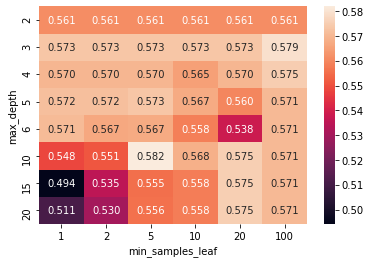

In [41]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

We get the best f1 score for min_samples_leaf = 5 and max_depth = 10.

We can also visualize individual trees that we train and the decisions from them:
    
    

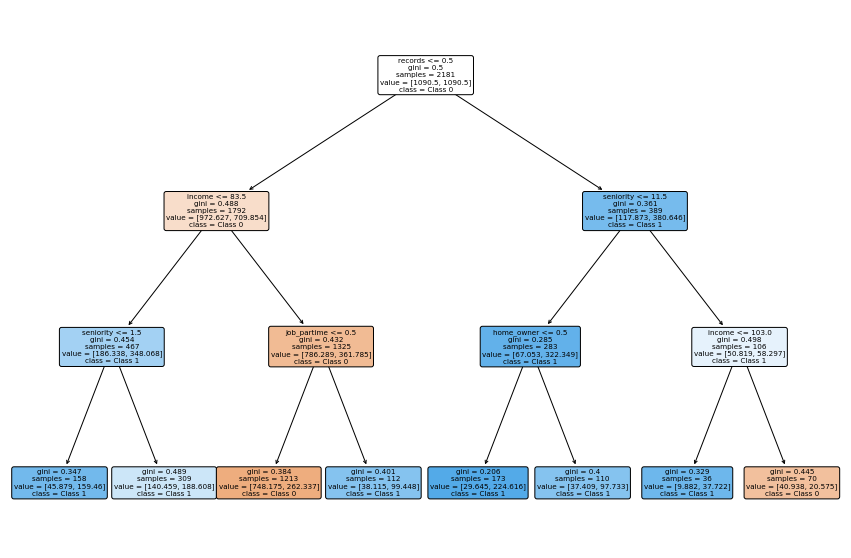

In [42]:
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
model.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], rounded=True)
plt.show()

## Random Forests <a id="random-forests">

Random forests are a more advanced model that combines the predictions of multiple decision trees. Each tree is trained on a random subset of features and a random subset of the training data, allowing it to capture different aspects of the dataset. By aggregating the predictions—usually through majority voting—random forests produce more robust and accurate results, reducing the risk of overfitting that can occur with a single decision tree.

Next, we'll use the `RandomForestClassifier` from `sklearn` and follow the same process we used with `DecisionTreeClassifier`.

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

f1_score(y_train, y_pred_train), f1_score(y_val, y_pred_val)

(1.0, 0.5441527446300716)

In [58]:
from tqdm import tqdm

scores = []
for max_depth in tqdm([2, 3, 4, 5, 6, 10, 15, 20]):
    for min_samples_leaf in [1,2,5,10,20,100]:
        model = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight='balanced')
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        scores.append((max_depth, min_samples_leaf, score))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.58s/it]


<AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>

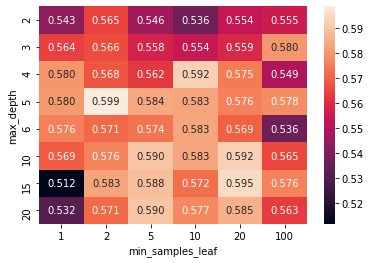

In [59]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

We observe that the highest F1 score achieved with the random forest is slightly better than what we obtained with a single decision tree.

## XGBoost <a id="xgboost">

XGBoost is another powerful tree-based model that combines the outputs of multiple decision trees to form the final prediction. Unlike Random Forest, where trees are trained independently in parallel, XGBoost trains decision trees sequentially. Each new tree is trained to correct the errors made by the previous trees. This process, known as boosting, allows XGBoost to focus on the difficult-to-predict cases, iteratively improving model performance with each tree. The predictions from all the trees are then combined to make a more accurate final prediction.

To use XGBoost classifier, you would need to install xgboost library.

In [60]:
# !pip install xgboost

Then we can import XGBClassifier from xgboost lib. and similarly train a single model.

In [61]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)

f1_score(y_val, y_pred_val)

0.5738396624472575

Now, let's serach through some of the model parameters:

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm

scores = []

for max_depth in tqdm([2, 3, 4, 5, 6, 10, 15, 20]):
    for min_child_weight in [1, 2, 5, 10, 20, 100]:
        # Initialize the model with the current max_depth and min_child_weight
        model = XGBClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            random_state=42)
        
        model.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        score = f1_score(y_val, y_pred_val)
        scores.append((max_depth, min_child_weight, score))

# Output the best scores
best_params = max(scores, key=lambda x: x[2])  # Find the best F1 score
print(f"Best parameters: max_depth={best_params[0]}, min_child_weight={best_params[1]}, F1 Score={best_params[2]}")


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:10<00:00,  1.34s/it]

Best parameters: max_depth=2, min_child_weight=10, F1 Score=0.5789473684210527


<AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>

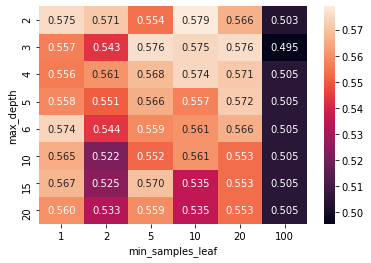

In [65]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The best scores we get are sligthly worse than for Random Forest.

### Improving accuracy <a id="setting-scale_pos_weight_param">

The results we obtained are worse than those from the Random Forest model. Recall that in the Random Forest model, we used the `class_weight='balanced'` parameter to handle the imbalance in the target classes. XGBoost offers a similar option, but we need to manually calculate the class weights. We can set the `scale_pos_weight` parameter by calculating the ratio of negative to positive samples and passing this value to address the class imbalance.

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm

scores = []

# Calculate scale_pos_weight (Number of negative samples / Number of positive samples)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

for max_depth in tqdm([2, 3, 4, 5, 6, 10, 15, 20]):
    for min_child_weight in [1, 2, 5, 10, 20, 100]:
        # Initialize the model with the current max_depth and min_child_weight
        model = XGBClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            random_state=42,
            scale_pos_weight=scale_pos_weight
        )
        
        model.fit(X_train, y_train)
        
        y_pred_val = model.predict(X_val)
        
        score = f1_score(y_val, y_pred_val)
        
        scores.append((max_depth, min_child_weight, score))

best_params = max(scores, key=lambda x: x[2])  # Find the best F1 score
print(f"Best parameters: max_depth={best_params[0]}, min_child_weight={best_params[1]}, F1 Score={best_params[2]}")

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:10<00:00,  1.28s/it]

Best parameters: max_depth=2, min_child_weight=1, F1 Score=0.6172413793103448


<AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>

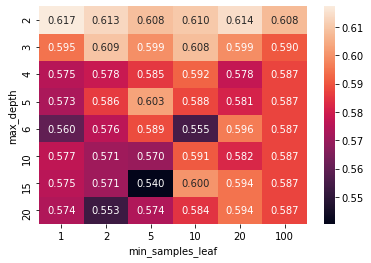

In [68]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [72]:
print("Best XGBoost score:", df_scores.score.max())

Best XGBoost score: 0.6172413793103448


Now, we can see that the f1 score has improved, and xgboost model gives the most accurate results so far.